In [105]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import *
from scipy import integrate
from scipy.integrate import ode


In [162]:
f = open ('parrov_bluerov.txt','r')
D={}
for i in f:
    [clave, valor]= i.split("=")
    D[clave] = float(valor[:-2])
f.close()


7.31


In [145]:
# Resolviendo ecuación diferencial
# defino las incognitas
x = sympy.Symbol('x')
y = sympy.Function('y')

# expreso la ecuacion
f = np.array([6*x**2 - 3*x**2*(y(x)), 6*x**3 - 3*x**2*(y(x))])

sympy.Eq(y(x).diff(x), f[0])


Eq(Derivative(y(x), x), -3*x**2*y(x) + 6*x**2)

In [146]:
sympy.Eq(y(x).diff(x), f[1])

Eq(Derivative(y(x), x), 6*x**3 - 3*x**2*y(x))

x**2 + y(x)**2 - 1

In [158]:
f_np1 = sympy.lambdify((y(x), x), f[0])
f_np2 = sympy.lambdify((y(x), x), f[0])

# Definimos los valores de la condición inicial y el rango de x sobre los 
# que vamos a iterar para calcular y(x)
y0 = 0.00 #Condicion Inicial
xp = np.linspace(0,1, 1000) #Valores de x

# Calculando la solución numerica para los valores de y0 y xp
yp = integrate.odeint(f_np2, y0, xp)

# Aplicamos el mismo procedimiento para valores de x negativos
xn = np.linspace(0, -1, 1000)
yn = integrate.odeint(f_np, y0, xn)

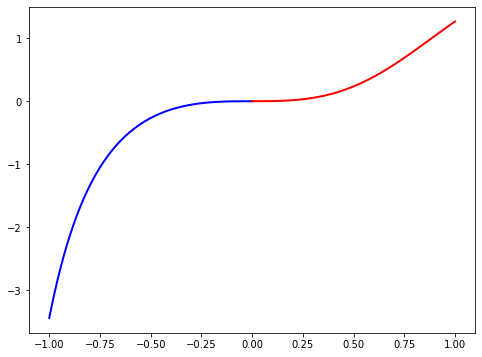

In [159]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
#plot_direction_field(x, y(x), f, ax=axes)
axes.plot(xn, yn, 'b', lw=2)
axes.plot(xp, yp, 'r', lw=2)
plt.show()